In [1]:
from tasks import Task, Transition, Worker, System
from scheduler import Scheduler
import matplotlib.pyplot as plt
import numpy as np

In [12]:
hotplate = Worker(
    name='hotplate',
    capacity=25
)

spincoater = Worker(
    name='spincoater',
    capacity=1
)

storage = Worker(
    name='storage',
    capacity=45,
    initial_fill=45
)

characterization = Worker(
    name='characterization line',
    capacity=1
)

arm = Worker(
    name='arm',
    capacity=1
)

In [13]:
transitions = [
    Transition(
        duration=28,
        source=storage,
        destination=spincoater,
        workers=[arm]
    ),
    Transition(
        duration=20,
        source=spincoater,
        destination=hotplate,
        workers=[arm]
    ),
    Transition(
        duration=15,
        source=hotplate,
        destination=storage,
        workers=[arm]
    ),
    Transition(
        duration=15,
        source=storage,
        destination=characterization,
        workers=[arm]
    ),
    Transition(
        duration=15,
        source=characterization,
        destination=storage,
        workers=[arm]
    )
]

In [14]:
system = System(
    workers=[storage, spincoater, hotplate, arm, characterization],
    transitions=transitions,
    starting_worker=storage,
    ending_worker=storage
)

In [15]:
def generic_worklist(idx, min_start=0):
    return system.generate_protocol(
        name = f'sample{idx}',
        worklist = [
            Task(
                name='spincoat',
                workers=[spincoater],
                duration=40 + np.random.random()*20,
                immediate=True,
            ),
            Task(
                name='anneal',
                workers=[hotplate],
                duration=np.random.choice([1800, 2400]),
                immediate=True
            ),
            Task(
                name='rest',
                workers=[storage],
                duration=180,
                immediate=True
            ),
            Task(
                name='characterize',
                workers=[characterization],
                duration=300,
                immediate=False
            ),
        ],
        min_start=min_start
    )

In [56]:
p1 = [generic_worklist(0+i, 0) for i in range(10)]

# Scheduling

solution status: FEASIBLE


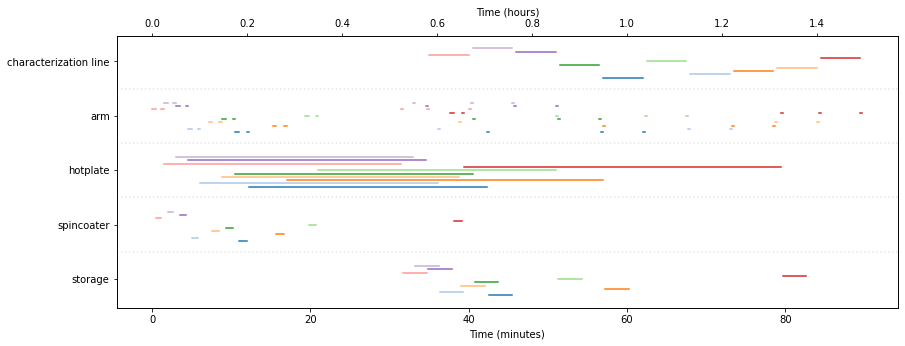

In [57]:
scheduler = Scheduler(
    system=system,
    protocols=p1,
    enforce_protocol_order=False
)
scheduler.solve(solve_time=10)
scheduler.plot_solution()

In [58]:
def add_and_solve(batch_size):
    n_protocols = len(scheduler.protocols)
    start_time = scheduler.get_tasklist_by_worker()[characterization][-5].end + 60
    print(start_time)
    p1 = [generic_worklist(n_protocols+i, start_time) for i in range(batch_size)]
    scheduler.add_protocols(p1)
    scheduler.solve(solve_time=10)

In [59]:
for i in range(35):
    add_and_solve(1)

4109
solution status: OPTIMAL
4439
solution status: OPTIMAL
4769
solution status: OPTIMAL
5099
solution status: OPTIMAL
5429
solution status: OPTIMAL
7175
solution status: OPTIMAL
7513
solution status: OPTIMAL
7843
solution status: OPTIMAL
8173
solution status: OPTIMAL
8503
solution status: OPTIMAL
10241
solution status: OPTIMAL
10571
solution status: OPTIMAL
10901
solution status: OPTIMAL
11231
solution status: OPTIMAL
11561
solution status: OPTIMAL
12708
solution status: OPTIMAL
13637
solution status: OPTIMAL
13967
solution status: OPTIMAL
14297
solution status: OPTIMAL
14633
solution status: OPTIMAL
15782
solution status: OPTIMAL
16704
solution status: OPTIMAL
17041
solution status: OPTIMAL
17371
solution status: OPTIMAL
17701
solution status: OPTIMAL
18245
solution status: OPTIMAL
19766
solution status: OPTIMAL
20119
solution status: OPTIMAL
20449
solution status: OPTIMAL
20779
solution status: OPTIMAL
21313
solution status: OPTIMAL
22844
solution status: OPTIMAL
23174
solution sta

In [60]:
len(scheduler.protocols)

45

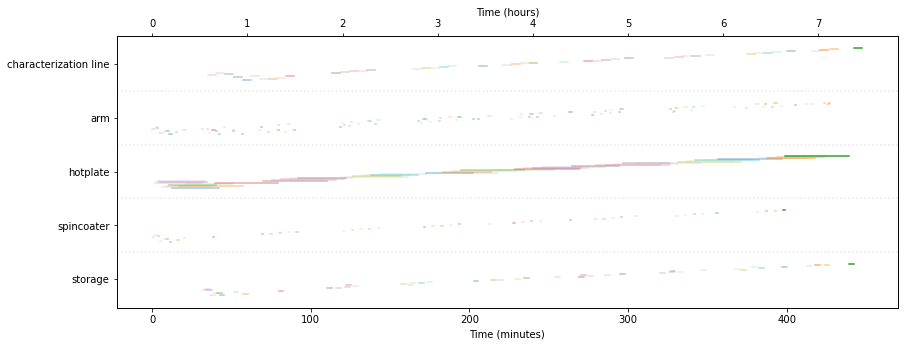

In [61]:
scheduler.plot_solution()